In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, models
from tensorflow.keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df= pd.read_csv('mental-state.csv')
data_new= pd.get_dummies(df, columns = ['Label'])

In [3]:
data_new

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label_0.0,Label_1.0,Label_2.0
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,0,0,1
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,0,0,1
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,0,0,1
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,0,1,0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,15.762328,19.113555,23.696867,7.568395,-6.503336,6.867187,-11.955396,-16.519912,19.838319,14.333094,...,0.004102,0.003156,0.003659,0.010179,0.004591,0.013817,0.004536,1,0,0
2475,34.675582,34.200645,-57.624820,-4.825609,7.382353,2.324416,-1.341208,-4.178625,26.383597,28.782987,...,0.001702,0.003121,0.002686,0.001645,0.001770,0.001038,0.001973,0,0,1
2476,29.813809,29.623031,-86.503988,7.532121,-19.581287,-0.628400,133.947160,-2.049096,45.484851,32.163999,...,0.000263,0.000701,0.000797,0.001096,0.000388,0.000529,0.001079,0,0,1
2477,59.453973,17.944332,-10.164238,42.568211,-1.300655,-19.993690,-54.331696,12.947622,55.203380,40.228490,...,0.004063,0.001662,0.002665,0.002353,0.003976,0.001660,0.003229,0,0,1


In [4]:
x=data_new.loc[:,'lag1_mean_0':'freq_750_3']
x.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000579,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.000448,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.001028,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.015502,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.013212,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836


In [5]:
y=data_new.loc[:,'Label_0.0':'Label_2.0']
y.head()

,Label_0.0,Label_1.0,Label_2.0
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [7]:
from sklearn.decomposition import KernelPCA

In [8]:
kpca = KernelPCA(n_components=64,kernel='rbf')

In [9]:
X_pca = kpca.fit_transform(X_scaled)
df_pca = pd.concat([pd.DataFrame(X_pca), y], axis=1)

In [10]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,Label_0.0,Label_1.0,Label_2.0
0,0.297849,0.119659,0.010189,-0.040967,-0.031069,-0.149366,0.032674,-0.023312,0.016385,-0.031270,...,-0.036262,0.083469,0.018670,-0.054247,0.054909,-0.018380,-0.021884,0,0,1
1,0.306944,0.206340,-0.124424,-0.000305,0.035877,-0.049474,-0.034111,0.002305,-0.020476,-0.022706,...,0.019440,0.061171,0.016695,-0.100815,0.029010,-0.035726,0.023559,0,0,1
2,0.547152,-0.103030,-0.140274,-0.037888,-0.122875,-0.089208,-0.006034,-0.153586,0.010439,-0.022968,...,0.063986,0.015127,-0.002270,-0.037650,0.023296,0.038561,0.037274,0,0,1
3,-0.258242,-0.090302,-0.015256,-0.041658,-0.034132,0.078394,0.017149,-0.106242,0.017621,0.073247,...,0.002457,0.030505,-0.011927,-0.058689,0.040897,0.056194,-0.002891,0,1,0
4,-0.004751,0.360870,0.168487,0.216504,-0.078917,0.061536,0.002307,-0.039856,0.011366,0.006206,...,0.000478,-0.018126,0.020353,-0.016795,-0.010428,-0.007948,0.000323,0,0,1


In [11]:
X_pca.shape

(2479, 64)

In [12]:
y

,Label_0.0,Label_1.0,Label_2.0
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
2474,1,0,0
2475,0,0,1
2476,0,0,1
2477,0,0,1


In [13]:
y=y.values

In [14]:
y1=np.argmax(y,axis=1)

In [15]:
y1

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y1,test_size=0.2,random_state=123)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=123)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
t = MinMaxScaler()
t.fit(x_train)
x_train = t.transform(x_train)
x_val=t.transform(x_val)
x_test = t.transform(x_test)

In [19]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [20]:
n_inputs = X_pca.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [21]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                             

In [23]:
history = model.fit(x_train, y_train, epochs=55, batch_size=45, verbose=1, validation_data=(x_val,y_val))

Epoch 1/55
36/36 [==============================] - 2s 10ms/step - loss: 1.0360 - val_loss: 0.9369
Epoch 2/55
36/36 [==============================] - 0s 4ms/step - loss: 0.1907 - val_loss: 0.8841
Epoch 3/55
36/36 [==============================] - 0s 3ms/step - loss: 0.1214 - val_loss: 0.7251
Epoch 4/55
36/36 [==============================] - 0s 4ms/step - loss: 0.1044 - val_loss: 0.5699
Epoch 5/55
36/36 [==============================] - 0s 3ms/step - loss: 0.0865 - val_loss: 0.4424
Epoch 6/55
36/36 [==============================] - 0s 4ms/step - loss: 0.0717 - val_loss: 0.3450
Epoch 7/55
36/36 [==============================] - 0s 3ms/step - loss: 0.0736 - val_loss: 0.2339
Epoch 8/55
36/36 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.2265
Epoch 9/55
36/36 [==============================] - 0s 3ms/step - loss: 0.0686 - val_loss: 0.1917
Epoch 10/55
36/36 [==============================] - 0s 4ms/step - loss: 0.0599 - val_loss: 0.1315
Epoch 11/55
36/36 

In [24]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder17.h5')

In [25]:
encoder = load_model('encoder17.h5')

# encode the train data
X_train_encode = encoder.predict(x_train)
X_val_encode = encoder.predict(x_val)
# encode the test data
X_test_encode = encoder.predict(x_test)

16/16 [==============================] - 0s 1ms/step


In [26]:
X_train_encode.shape, X_val_encode.shape, X_test_encode.shape

((1586, 32), (397, 32), (496, 32))

In [27]:
y_train_bin=label_binarize(y_train,classes=np.unique(y_train))
y_val_bin=label_binarize(y_val,classes=np.unique(y_val))
y_test_bin=label_binarize(y_test,classes=np.unique(y_test))

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU

In [52]:
inputs = tf.keras.Input(shape=(X_train_encode.shape[1],1))

gru = tf.keras.layers.GRU(128, return_sequences=True)(inputs)
flat = layers.Flatten()(gru)
outputs = layers.Dense(3, activation='softmax')(flat)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 1)]           0         
                                                                 
 gru_2 (GRU)                 (None, 32, 128)           50304     
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 62,595
Trainable params: 62,595
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [55]:
#Defining other parameters for our CNN model

model = model

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
           tf.keras.metrics.AUC(name='AUC')]

CALLBACKS = [my_callback]


model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 1)]           0         
                                                                 
 gru_2 (GRU)                 (None, 32, 128)           50304     
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 62,595
Trainable params: 62,595
Non-trainable params: 0
_________________________________________________________________


In [56]:
history=model.fit(X_train_encode,y_train_bin,batch_size=55,epochs=65,verbose=1,validation_data=(X_val_encode,y_val_bin))

Epoch 1/65
29/29 [==============================] - 4s 48ms/step - loss: 0.4362 - Accuracy: 0.8808 - AUC: 0.9716 - val_loss: 0.2393 - val_Accuracy: 0.9370 - val_AUC: 0.9815
Epoch 2/65
29/29 [==============================] - 1s 25ms/step - loss: 0.0931 - Accuracy: 0.9836 - AUC: 0.9969 - val_loss: 0.1634 - val_Accuracy: 0.9421 - val_AUC: 0.9926
Epoch 3/65
29/29 [==============================] - 1s 25ms/step - loss: 0.0601 - Accuracy: 0.9830 - AUC: 0.9990 - val_loss: 0.1447 - val_Accuracy: 0.9446 - val_AUC: 0.9931
Epoch 4/65
29/29 [==============================] - 1s 25ms/step - loss: 0.0444 - Accuracy: 0.9905 - AUC: 0.9995 - val_loss: 0.1298 - val_Accuracy: 0.9496 - val_AUC: 0.9939
Epoch 5/65
29/29 [==============================] - 1s 25ms/step - loss: 0.0302 - Accuracy: 0.9924 - AUC: 0.9997 - val_loss: 0.1221 - val_Accuracy: 0.9647 - val_AUC: 0.9945
Epoch 6/65
29/29 [==============================] - 1s 25ms/step - loss: 0.0246 - Accuracy: 0.9937 - AUC: 0.9998 - val_loss: 0.1244 - v

29/29 [==============================] - 1s 27ms/step - loss: 0.0121 - Accuracy: 0.9956 - AUC: 1.0000 - val_loss: 0.1568 - val_Accuracy: 0.9647 - val_AUC: 0.9892
Epoch 49/65
29/29 [==============================] - 1s 28ms/step - loss: 0.0118 - Accuracy: 0.9962 - AUC: 0.9997 - val_loss: 0.1488 - val_Accuracy: 0.9647 - val_AUC: 0.9906
Epoch 50/65
29/29 [==============================] - 1s 27ms/step - loss: 0.0116 - Accuracy: 0.9962 - AUC: 1.0000 - val_loss: 0.1608 - val_Accuracy: 0.9622 - val_AUC: 0.9890
Epoch 51/65
29/29 [==============================] - 1s 27ms/step - loss: 0.0134 - Accuracy: 0.9968 - AUC: 1.0000 - val_loss: 0.1746 - val_Accuracy: 0.9572 - val_AUC: 0.9917
Epoch 52/65
29/29 [==============================] - 1s 27ms/step - loss: 0.0126 - Accuracy: 0.9956 - AUC: 1.0000 - val_loss: 0.1488 - val_Accuracy: 0.9673 - val_AUC: 0.9906
Epoch 53/65
29/29 [==============================] - 1s 27ms/step - loss: 0.0096 - Accuracy: 0.9962 - AUC: 1.0000 - val_loss: 0.1598 - val_Acc

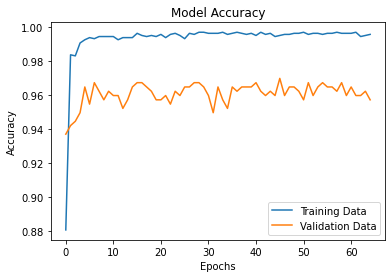

In [57]:
fig, ax = plt.subplots()
plt.plot(history.history['Accuracy'])

plt.plot(history.history['val_Accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

plt.show()
fig.savefig('./New_Results/Graphs/DL_models/GRU/Model_Accuracy1.png', format='png', dpi=300)

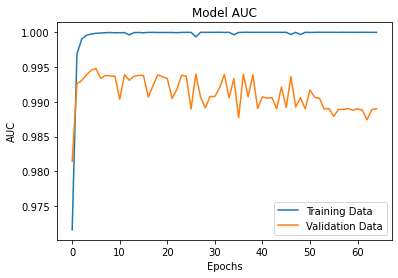

In [58]:
fig, ax = plt.subplots()
plt.plot(history.history['AUC'])

plt.plot(history.history['val_AUC'])

plt.title('Model AUC')

plt.ylabel('AUC')

plt.xlabel('Epochs')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

plt.show()
fig.savefig('./New_Results/Graphs/DL_models/GRU/Model_AUC1.png', format='png', dpi=300)

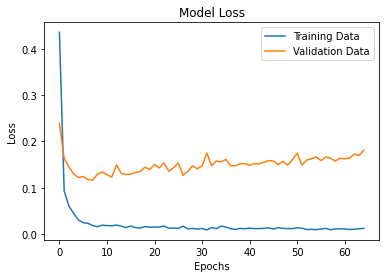

In [59]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model Loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend(['Training Data', 'Validation Data'], loc='upper right')

plt.show()
fig.savefig('./New_Results/Graphs/DL_models/GRU/Model_Loss1.png', format='png', dpi=300)

In [60]:
pred = model.predict(X_test_encode)

16/16 [==============================] - 0s 6ms/step


In [61]:
pred

array([[9.9997747e-01, 2.2505210e-05, 5.9197573e-12],
       [5.2929395e-03, 9.9461114e-01, 9.5972719e-05],
       [1.7269473e-07, 1.7244343e-05, 9.9998260e-01],
       ...,
       [1.5164207e-12, 7.3960194e-08, 9.9999988e-01],
       [2.5280809e-04, 9.9974531e-01, 1.9436686e-06],
       [3.3330028e-13, 2.6199306e-08, 1.0000000e+00]], dtype=float32)

In [62]:
y_test

array([0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0,

In [63]:
y_test_bin

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [64]:
y_pred=np.argmax(pred, axis=1)

In [65]:
y_pred

array([0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0,

In [66]:
y_prednew=label_binarize(y_pred,classes=np.unique(y_pred))
classes=np.unique(y_pred)

In [67]:
y_prednew

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [68]:
print("classification_report\n",classification_report(y_test,y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       167
           1       0.98      0.96      0.97       186
           2       0.95      1.00      0.98       143

    accuracy                           0.98       496
   macro avg       0.98      0.98      0.98       496
weighted avg       0.98      0.98      0.98       496



In [69]:
train_scores = model.evaluate(X_train_encode, y_train_bin)
val_scores = model.evaluate(X_val_encode, y_val_bin)
test_scores = model.evaluate(X_test_encode, y_test_bin)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

16/16 [==============================] - 0s 6ms/step - loss: 0.0833 - Accuracy: 0.9778 - AUC: 0.9963
Training Accuracy: 99.62%
Validation Accuracy: 95.72%
Testing Accuracy: 97.78%


In [70]:
from sklearn import metrics

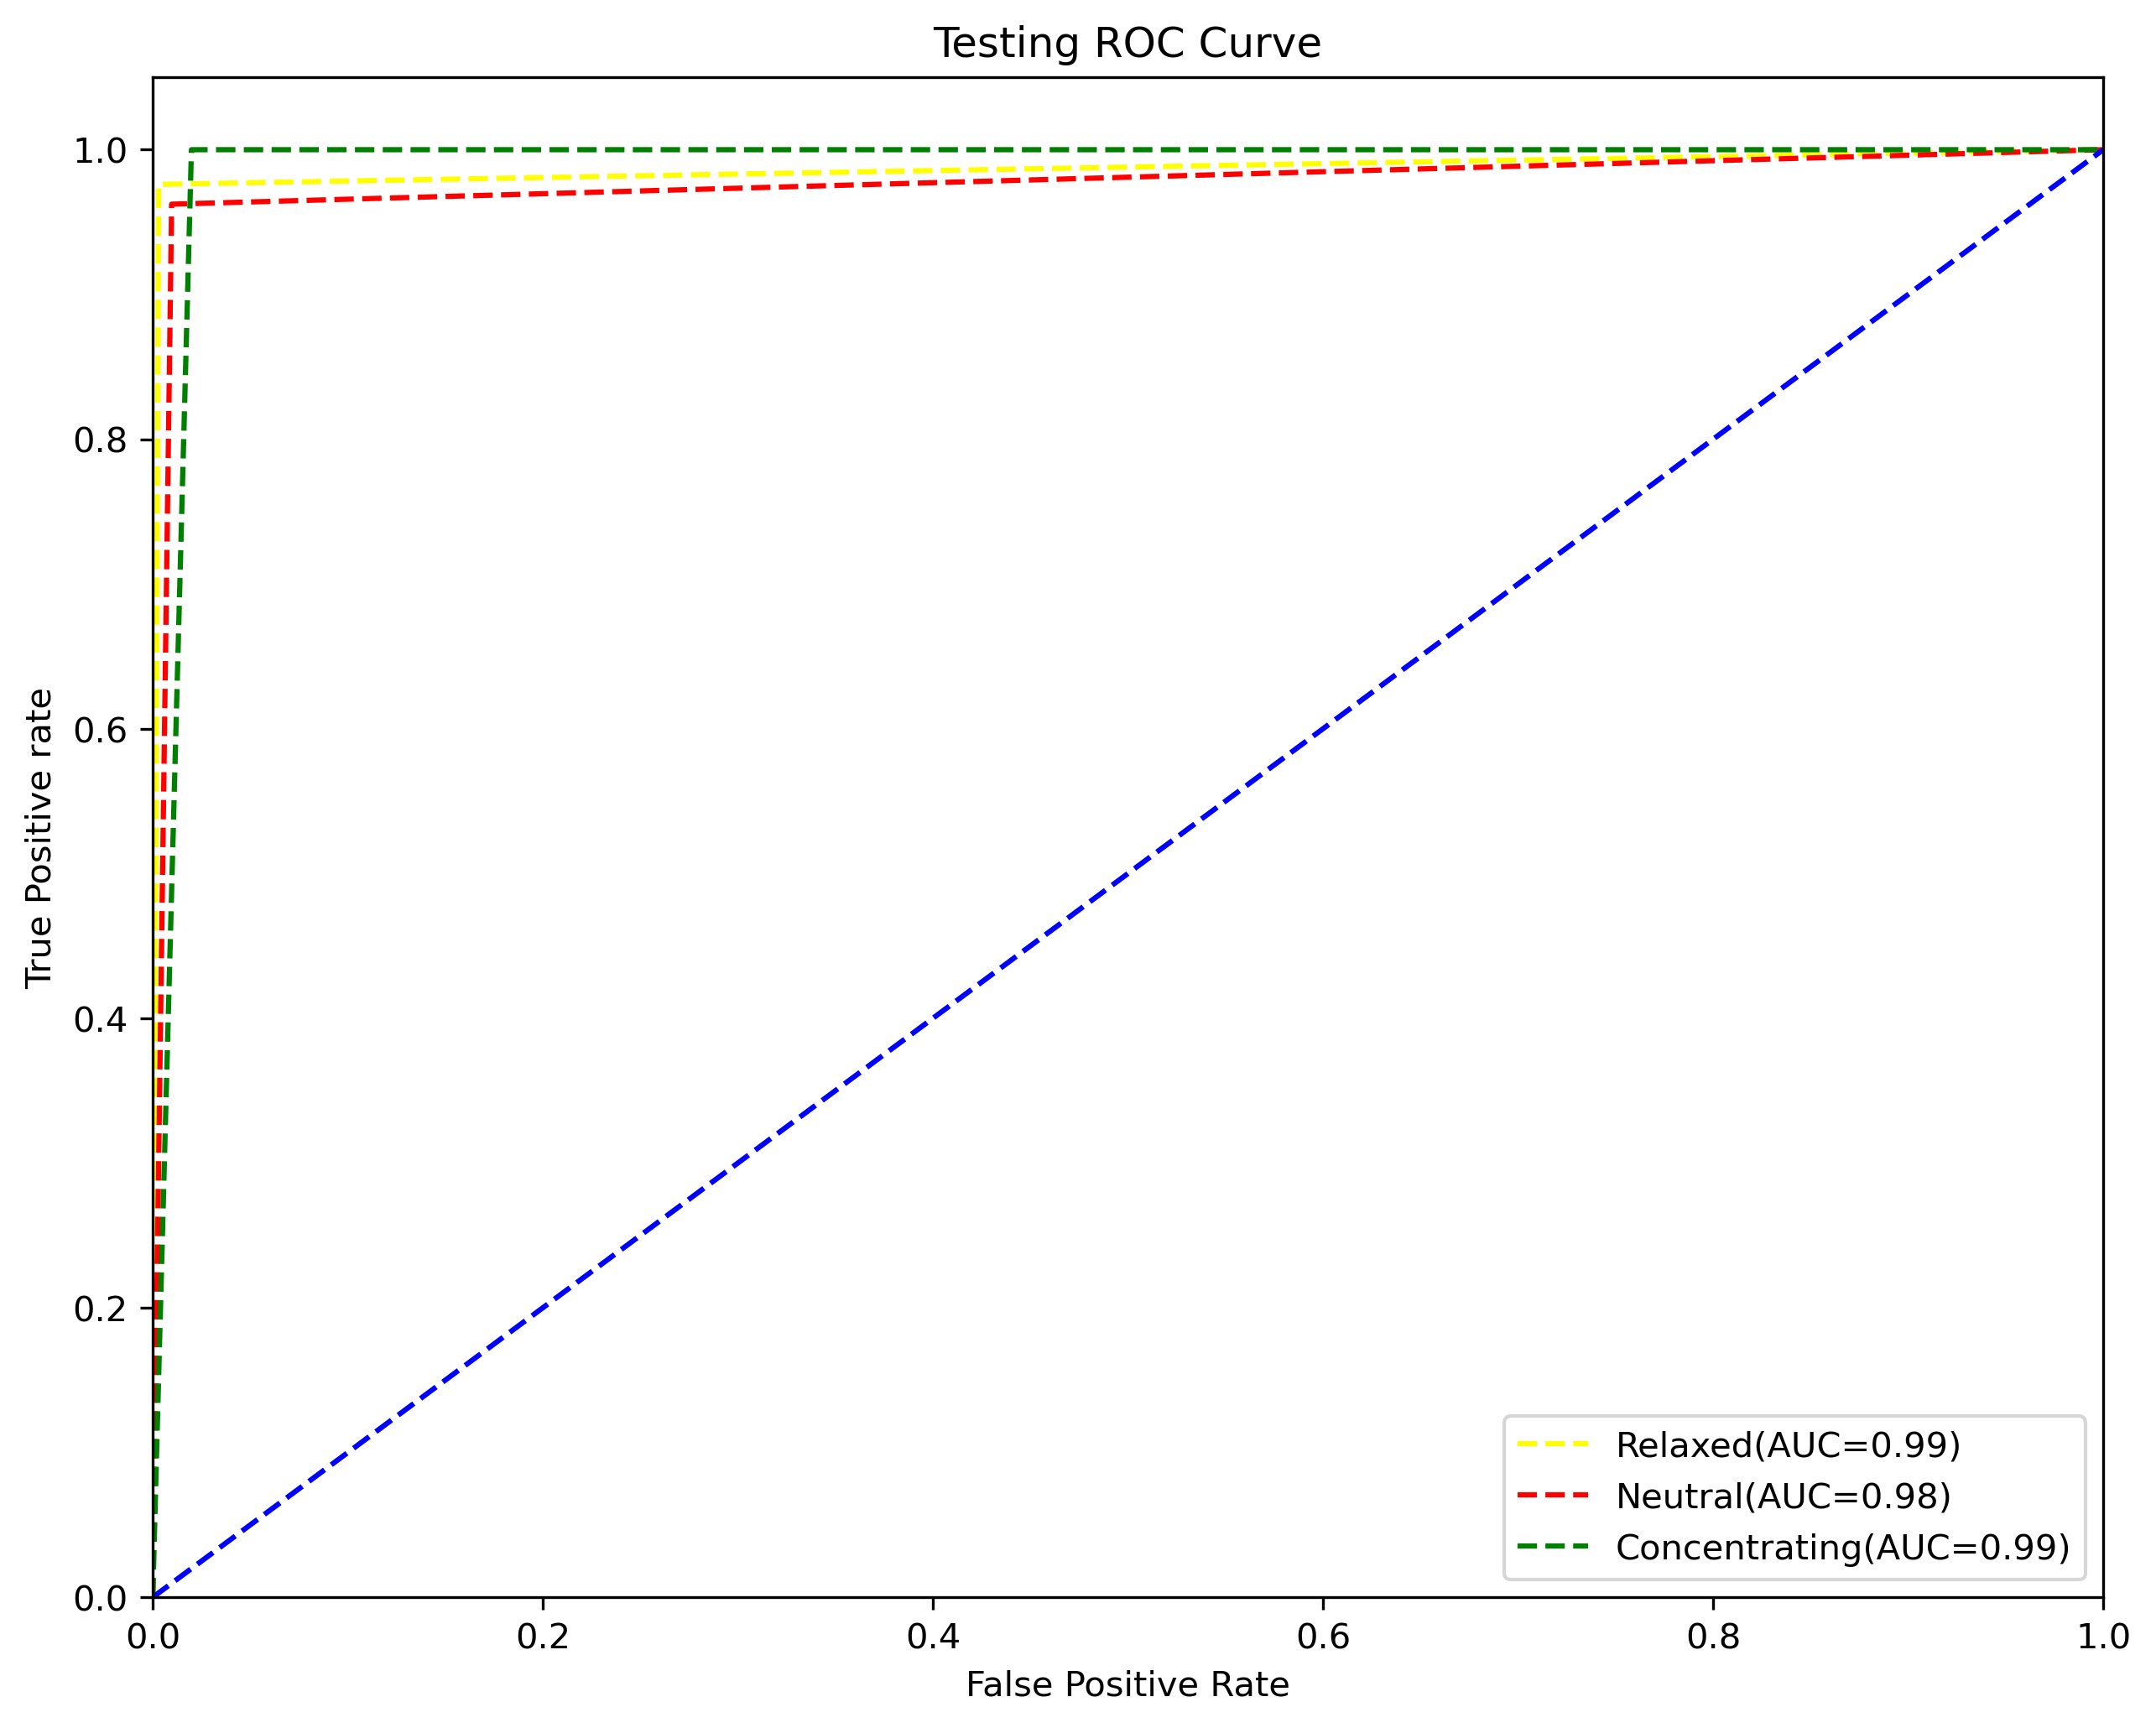

In [71]:
# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]
colors = ['yellow', 'red', 'green']
fig=plt.figure(figsize=(10, 8), dpi=300)
for i, color in zip(range(n_class),colors):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_bin[:,i],y_prednew[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Relaxed(AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Neutral(AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Concentrating(AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('./New_Results/ROC-AUC_Curve/DL_models/GRU/Testing1.png',dpi=300)

In [72]:
pred1 = model.predict(X_train_encode)

50/50 [==============================] - 0s 7ms/step


In [73]:
pred1

array([[3.8865204e-07, 9.9999678e-01, 2.9000396e-06],
       [1.8812576e-10, 9.9427052e-07, 9.9999905e-01],
       [9.9995029e-01, 4.9663027e-05, 4.1052751e-12],
       ...,
       [1.5282726e-03, 9.9846351e-01, 8.2579472e-06],
       [1.0000000e+00, 1.7582229e-09, 1.7095847e-16],
       [1.0000000e+00, 3.9961270e-09, 3.5263841e-15]], dtype=float32)

In [74]:
y_pred1=np.argmax(pred1, axis=1)

In [75]:
y_pred1

array([1, 2, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
y_prednew1=label_binarize(y_pred1,classes=np.unique(y_pred1))
classes=np.unique(y_pred1)

In [77]:
y_prednew1

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

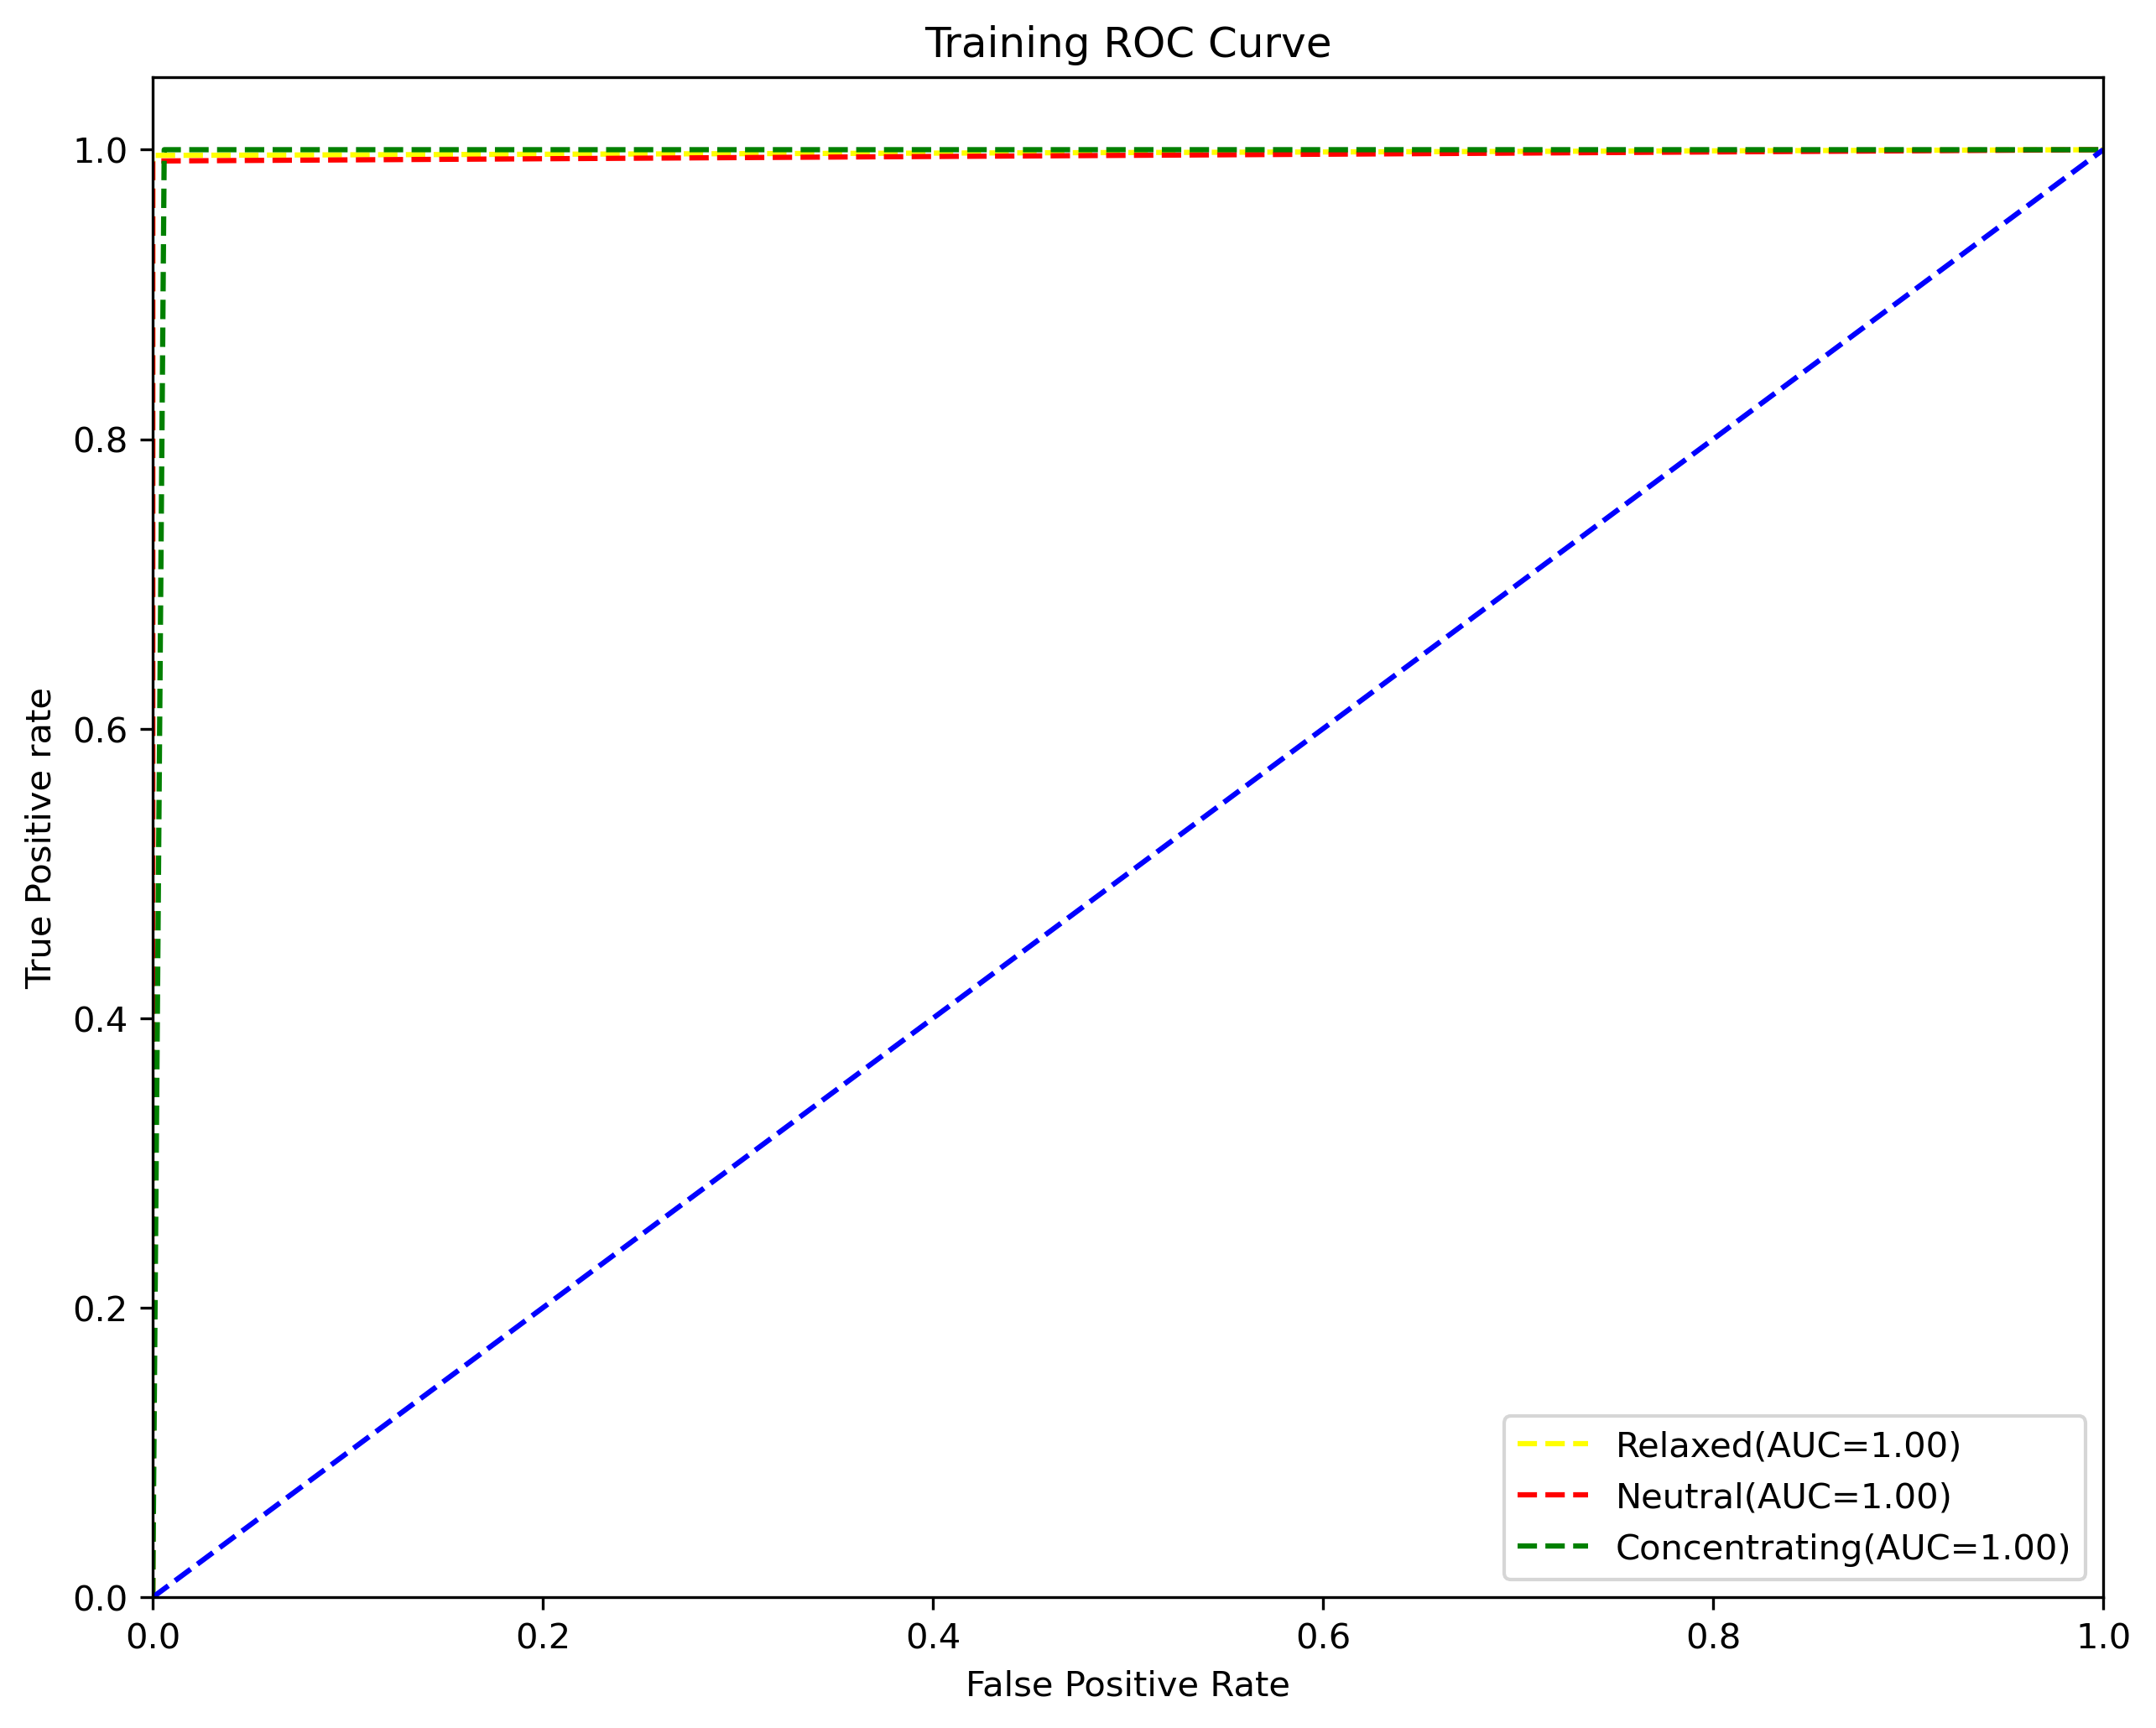

In [78]:
# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]
colors = ['yellow', 'red', 'green']
fig=plt.figure(figsize=(10, 8), dpi=300)
for i, color in zip(range(n_class),colors):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_train_bin[:,i],y_prednew1[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Relaxed(AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Neutral(AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Concentrating(AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('./New_Results/ROC-AUC_Curve/DL_models/GRU/Training1.png',dpi=300)

In [79]:
pred2 = model.predict(X_val_encode)

13/13 [==============================] - 0s 6ms/step


In [80]:
pred2

array([[9.9999976e-01, 2.8397676e-07, 3.0140142e-12],
       [1.8589541e-08, 1.3455902e-08, 1.0000000e+00],
       [1.4587697e-05, 9.9996185e-01, 2.3563218e-05],
       ...,
       [3.5573394e-05, 9.9996102e-01, 3.4076752e-06],
       [1.0000000e+00, 1.6486248e-10, 3.2491496e-17],
       [9.8994958e-01, 1.0050443e-02, 1.1966325e-09]], dtype=float32)

In [81]:
y_pred2=np.argmax(pred2, axis=1)

In [82]:
y_pred2

array([0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1,
       0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2,

In [83]:
y_prednew2=label_binarize(y_pred2,classes=np.unique(y_pred2))
classes=np.unique(y_pred2)

In [84]:
y_prednew2

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

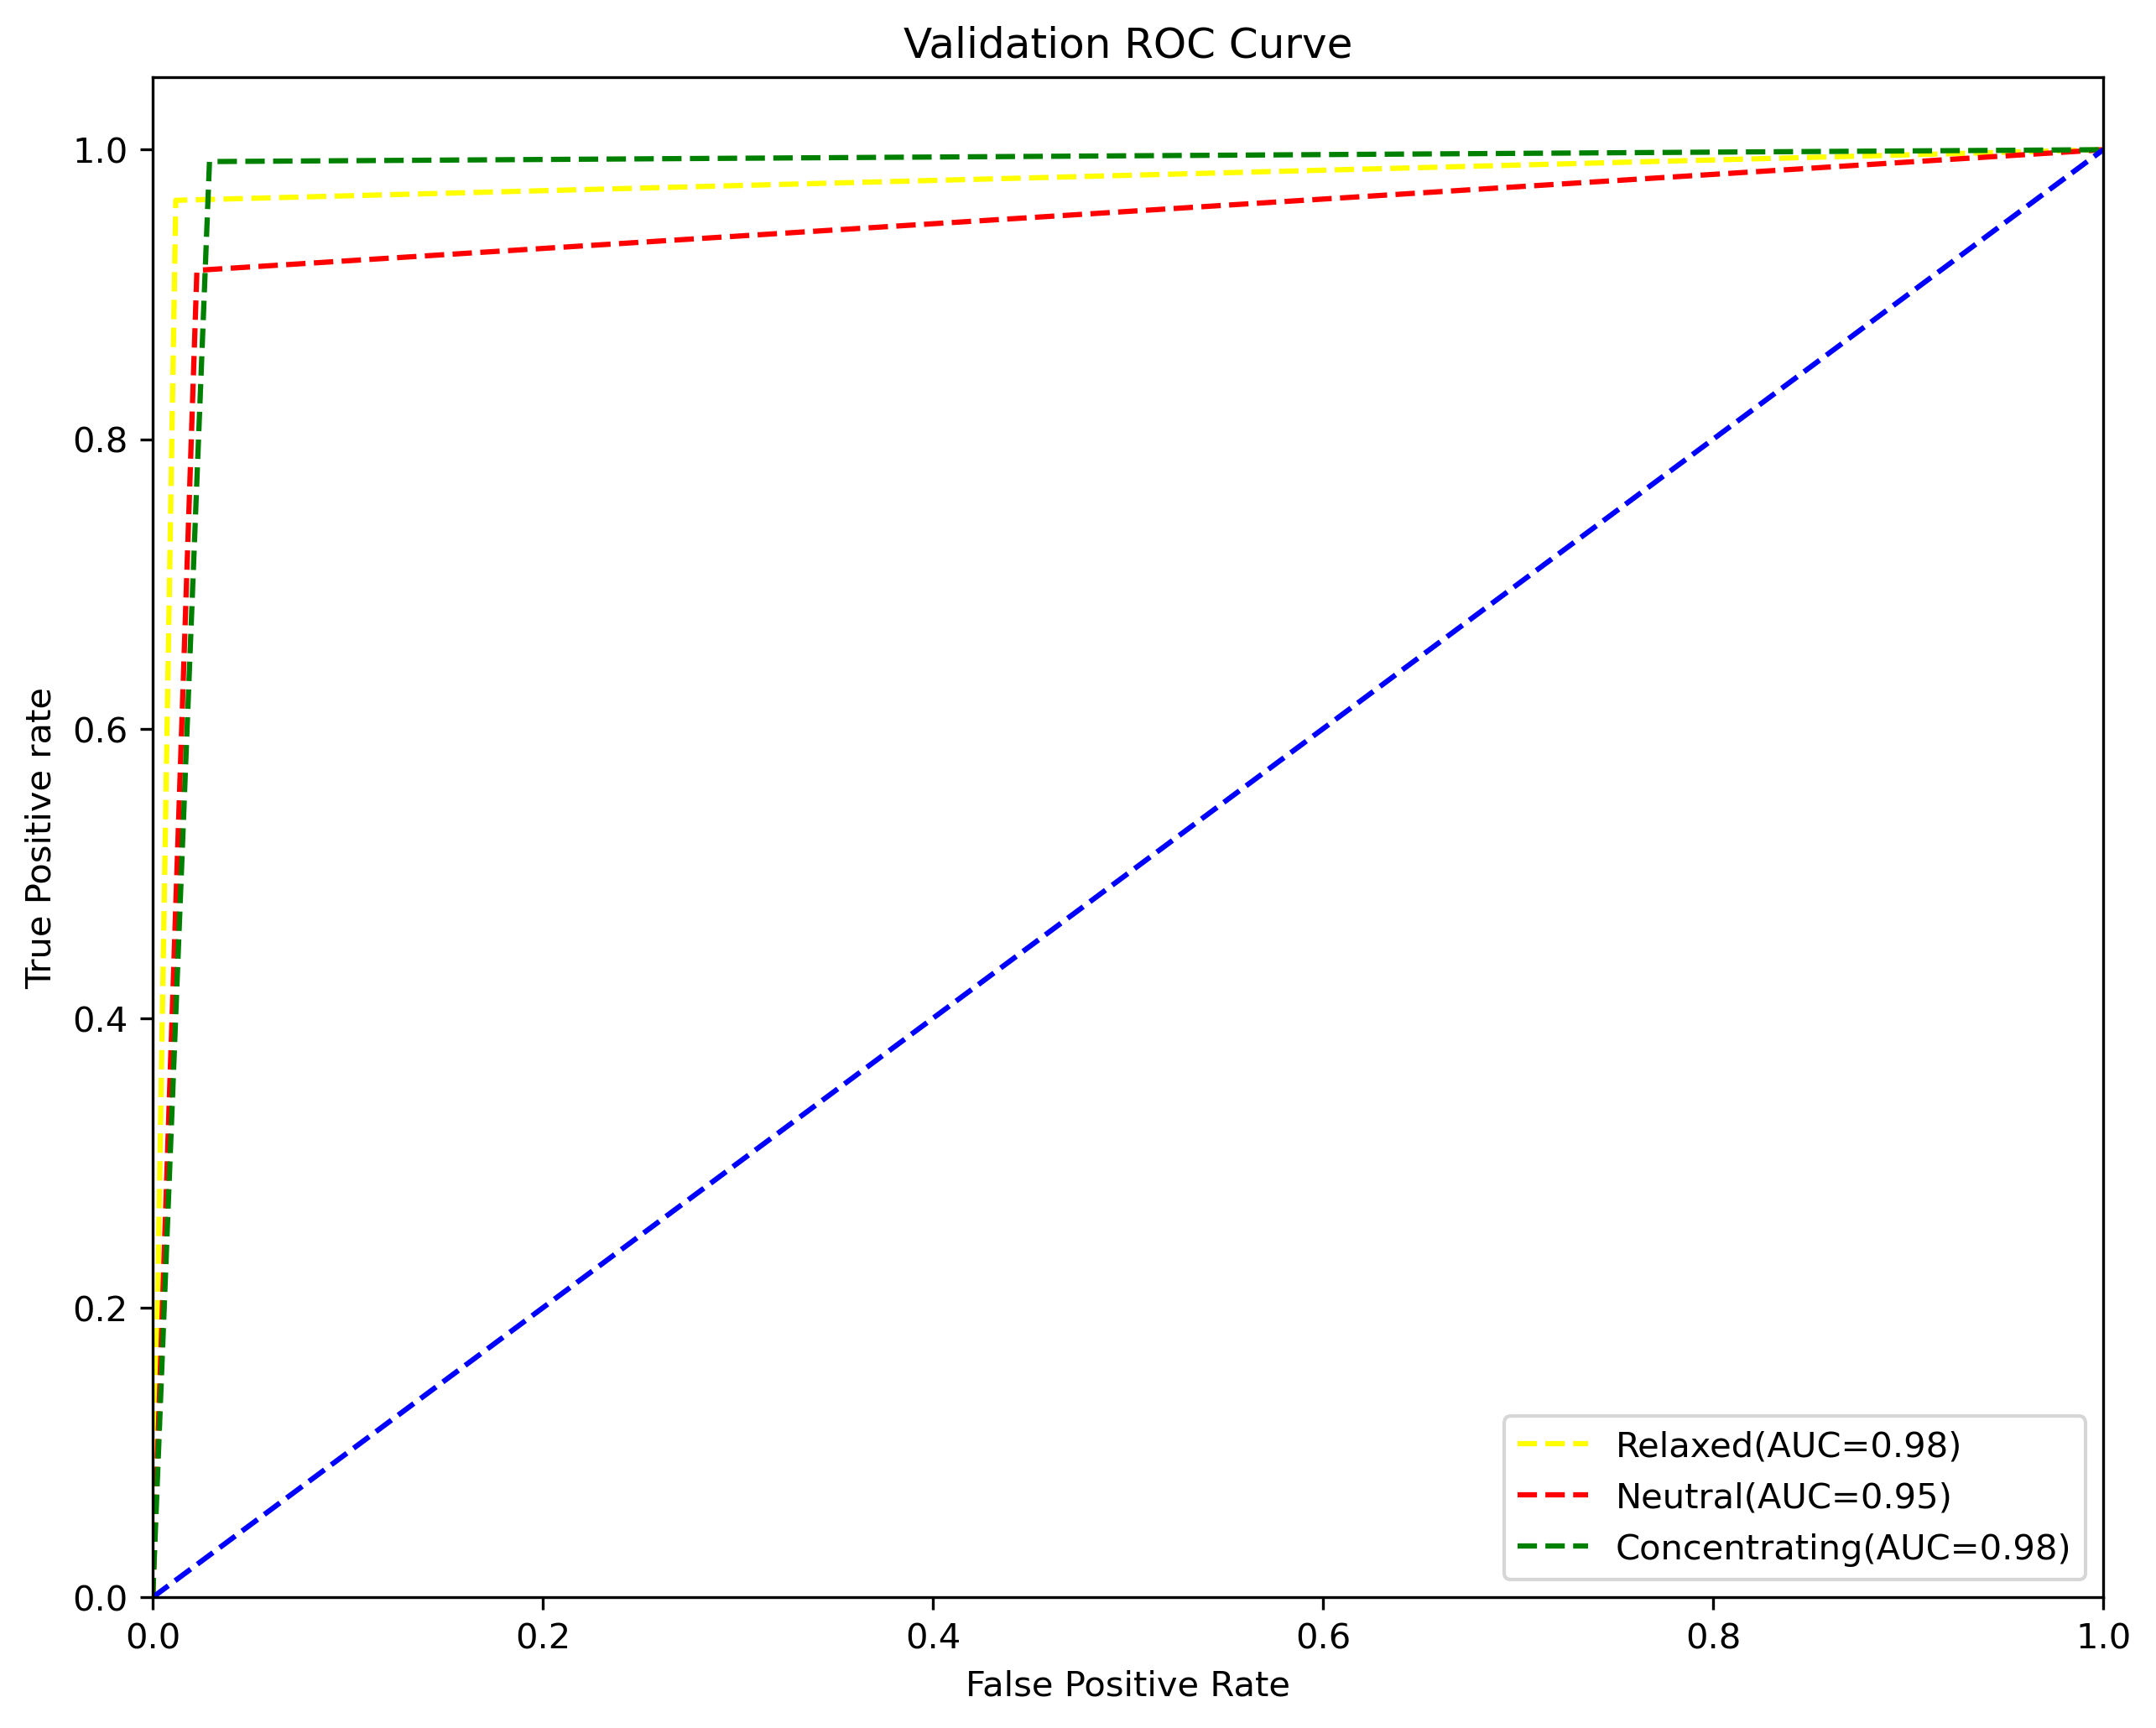

In [85]:
# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]
colors = ['yellow', 'red', 'green']
fig=plt.figure(figsize=(10, 8), dpi=300)
for i, color in zip(range(n_class),colors):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_val_bin[:,i],y_prednew2[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Relaxed(AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Neutral(AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color,label='Concentrating(AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('./New_Results/ROC-AUC_Curve/DL_models/GRU/Validation1.png',dpi=300)

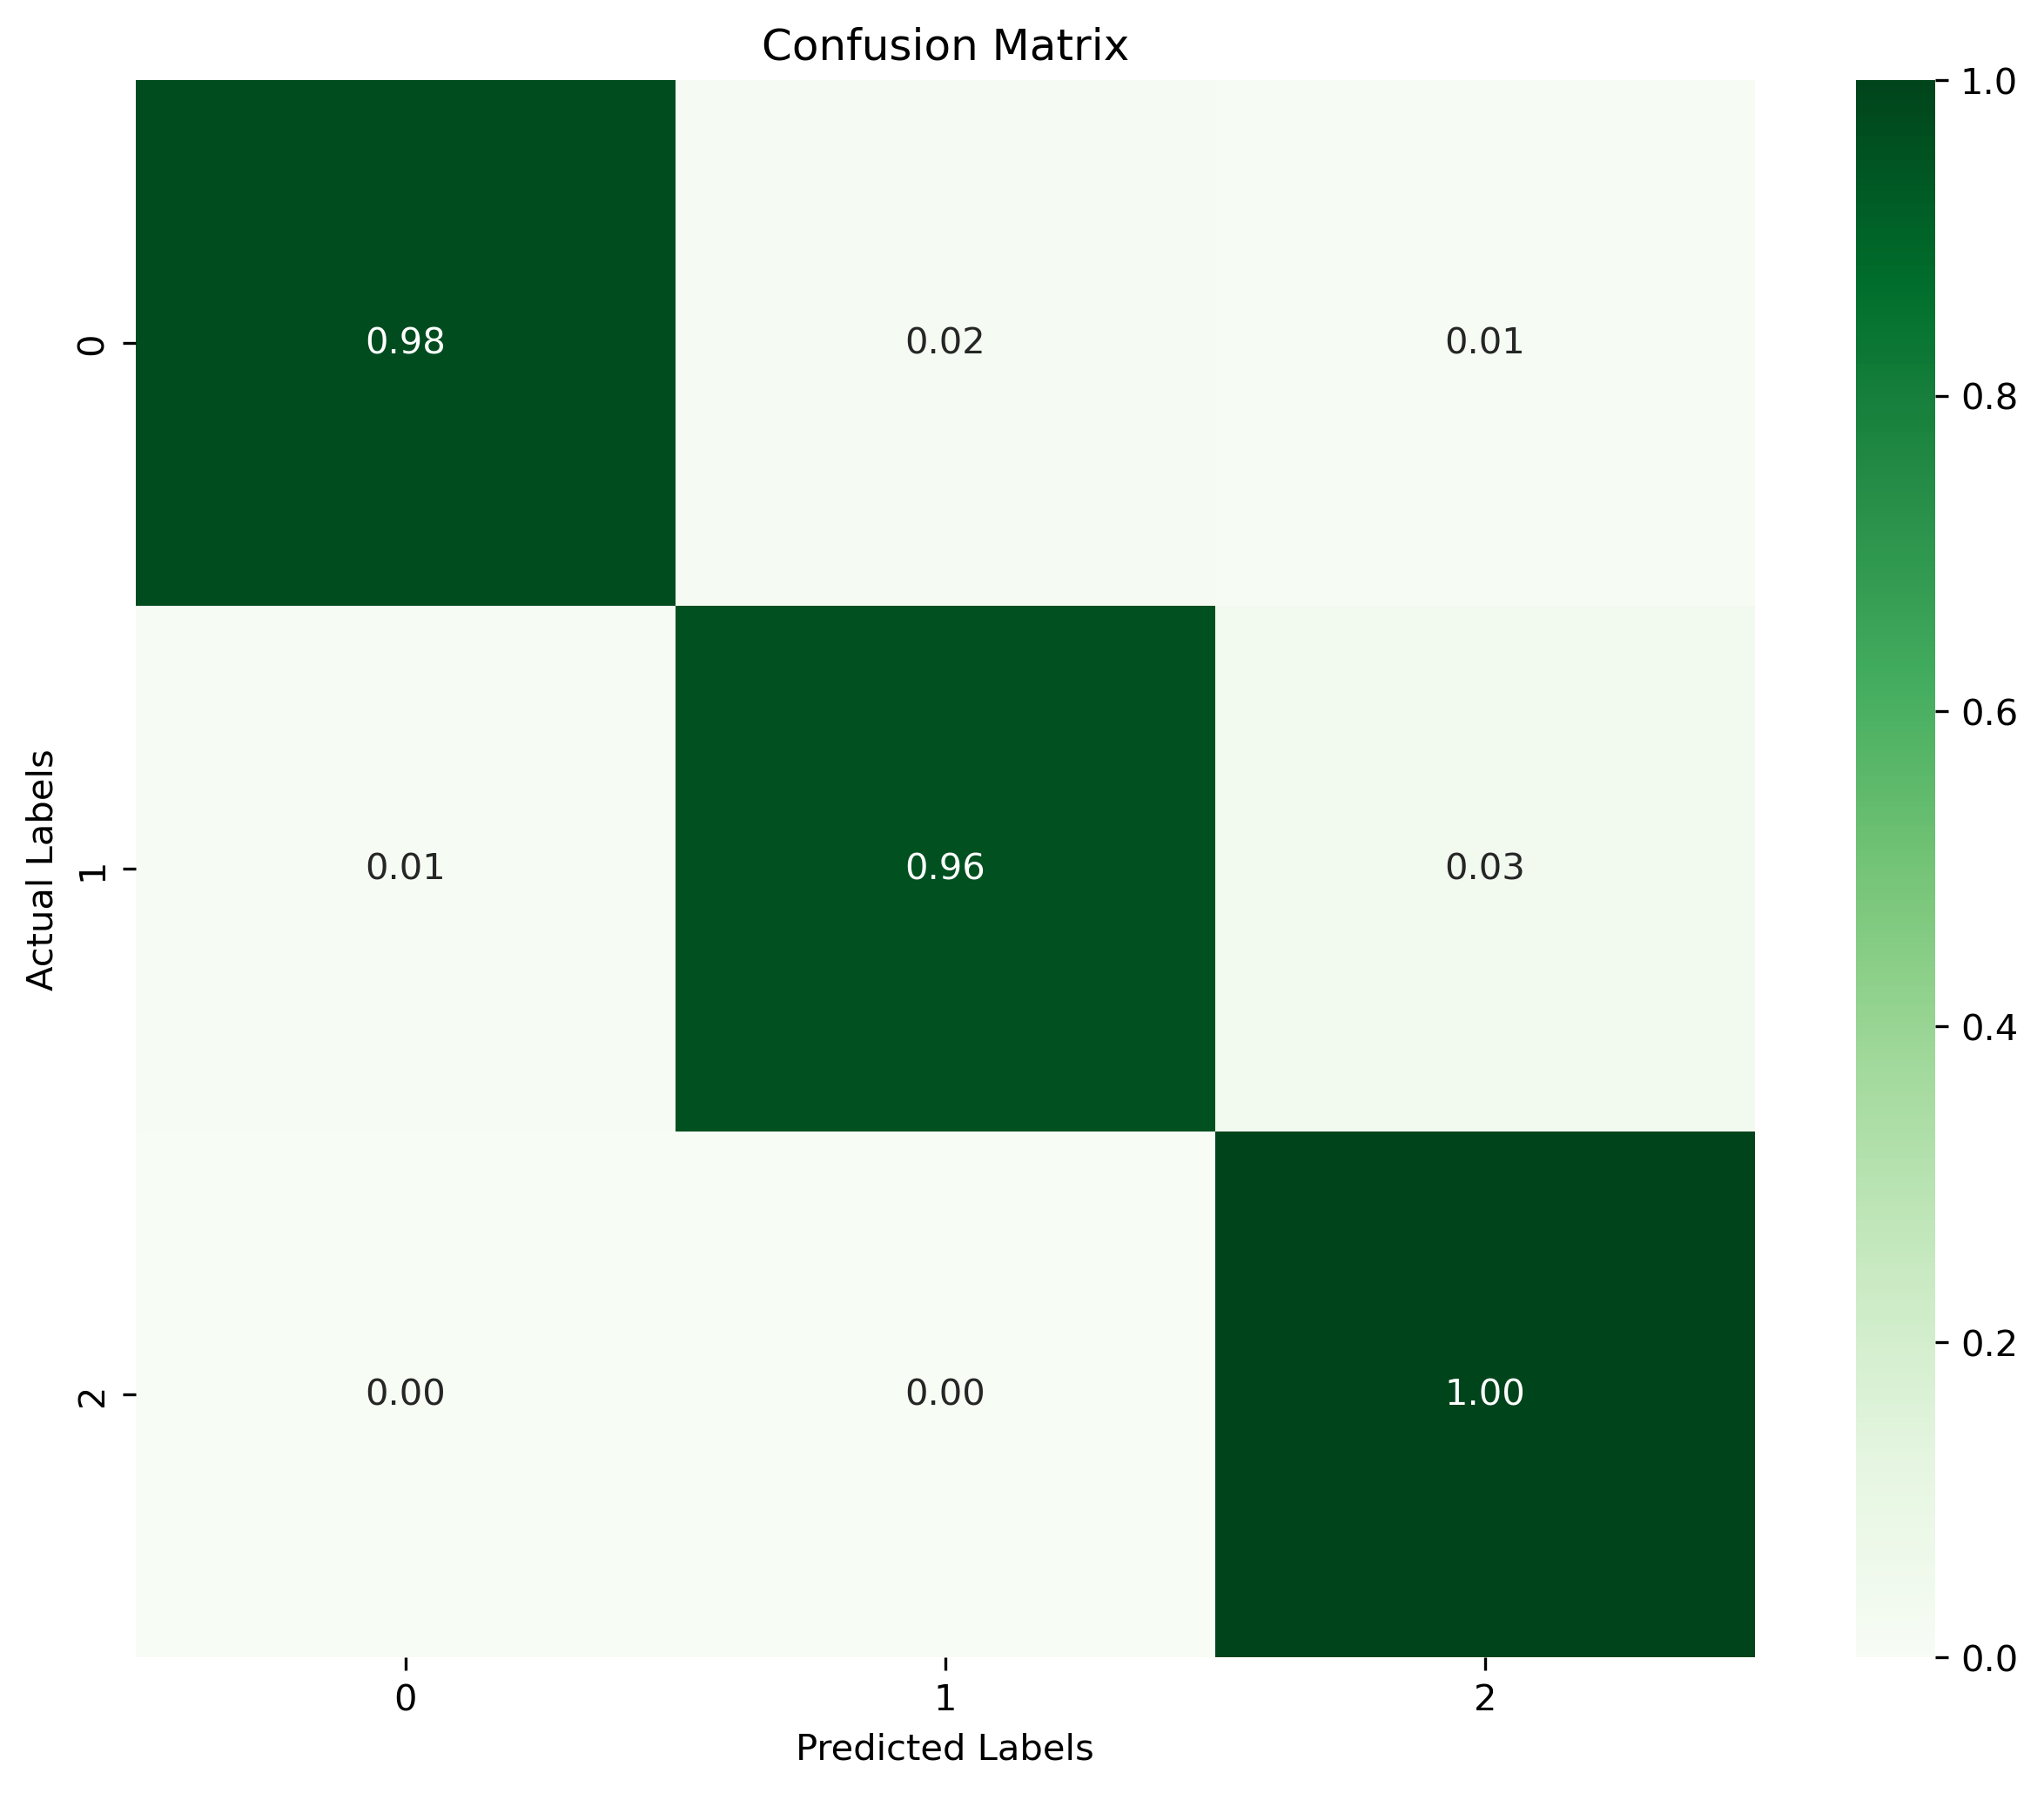

In [86]:
import numpy as np
import seaborn as sns

cf_matrix = confusion_matrix(y_test,y_pred)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)
sns_plot=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens')
sns_plot.set_xlabel('Predicted Labels')
sns_plot.set_ylabel('Actual Labels')
sns_plot.set_title('Confusion Matrix')
sns_plot.figure.savefig('./New_Results/Confusion_matrix/DL_models/GRU/Confusion_matrix1.png',dpi=300)

In [87]:
confusion_matrix(y_test,y_pred)

array([[163,   3,   1],
       [  1, 179,   6],
       [  0,   0, 143]], dtype=int64)

In [88]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [89]:
def sensitivity(y_test,y_pred):
        cm=confusion_matrix(y_test, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        return np.mean(Sensitivity)

def specificity(y_test,y_pred):
        cm=confusion_matrix(y_test, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)


print(sensitivity(y_test,y_pred))
print(specificity(y_test,y_pred))

# cross_validate(history, x, y, cv=5,scoring=scoring)

0.9794711651964887
0.9891510128795793
